# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **01.11.2024**

Мягкий дедлайн: **13.11.24 23:59**

Жесткий дедлайн: **15.11.24 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0.02 балла).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

$$\nabla_w Q(w) = \frac{1}{l}\nabla_w(y^Ty - y^TXw - w^TX^Ty + w^TX^TXw) = \frac{1}{l}(0 - 2X^Ty + 2X^TXw) = \frac{2}{l}X^T(Xw - y)$$

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$. Кроме того, соответственно своему названию, она должна обновлять веса. 

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения **(обратите внимание, что в данном домашнем задании длина шага не фиксируется)**. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение 

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Веса модели надо обновлять внутри функции `update_weights`, она неспроста так называется
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [3]:
%load_ext autoreload

In [156]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [7]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [9]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [11]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/54610/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**: 124396522


* **StochasticDescent**: 124510751


* **MomentumDescent**: 124531116


* **Adam**: 124636060


* **LinearRegression**: 124815179

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте (и напишите): какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте (и напишите): какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [13]:
import numpy as np
import pandas as pd  # при желании, можете заменить на polars/pyspark или что угодно, что вам нравится

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [51]:
data = pd.read_csv('autos.csv')  # разумеется, если вы используете не pandas, это надо поменять

In [45]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

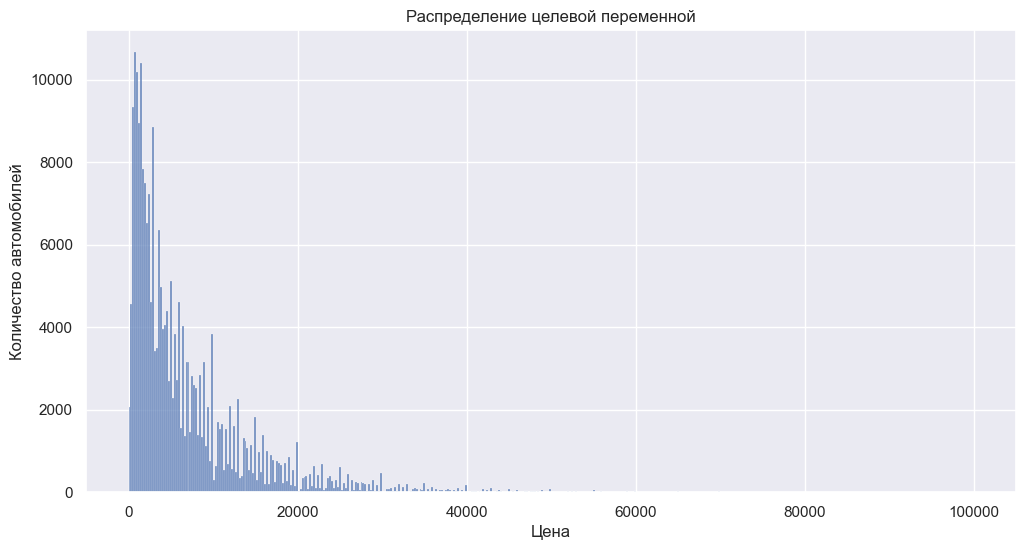

In [23]:
categorical = ['brand', 'model', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage']
numeric = ['powerPS', 'kilometer', 'autoAgeMonths']
other = []

plt.figure(figsize=(12, 6))
sns.histplot(data['price'])
plt.title('Распределение целевой переменной')
plt.xlabel('Цена')
plt.ylabel('Количество автомобилей')
plt.show()

Есть выбросы, уберем значения, где цена больше 6000, а также логарифмируем и посмотрим на распределение:

In [53]:
data = data[data['price'] <= 60000]

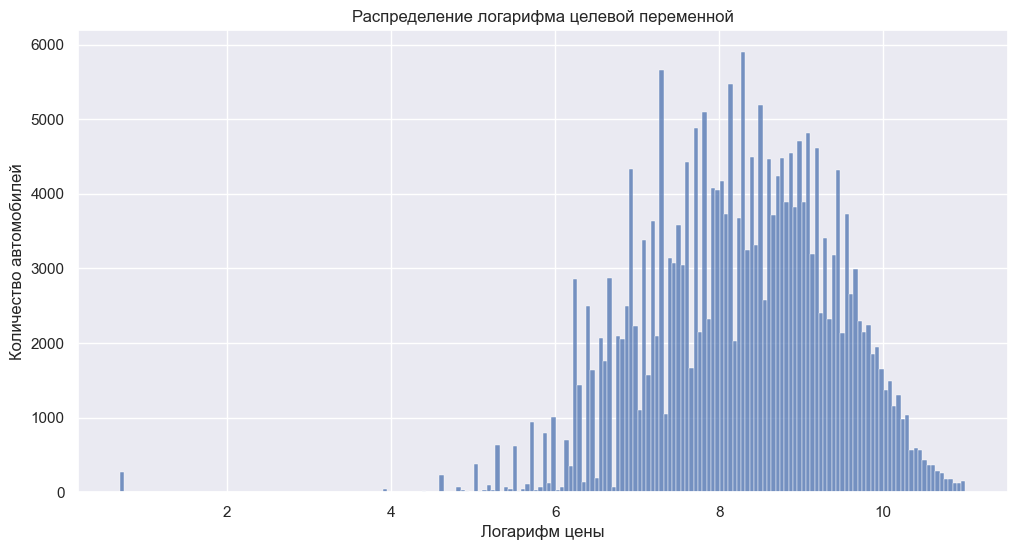

In [33]:
plt.figure(figsize=(12, 6))
sns.histplot(np.log1p(data['price']))
plt.title('Распределение логарифма целевой переменной')
plt.xlabel('Логарифм цены')
plt.ylabel('Количество автомобилей')
plt.show()

Логарифм выглядит более разумно, оставим его:

In [55]:
data['price'] = np.log1p(data['price'])

Видим, что есть выбросы около нуля, давайте тоже их уберем:

In [57]:
data = data[data['price'] >= 4]

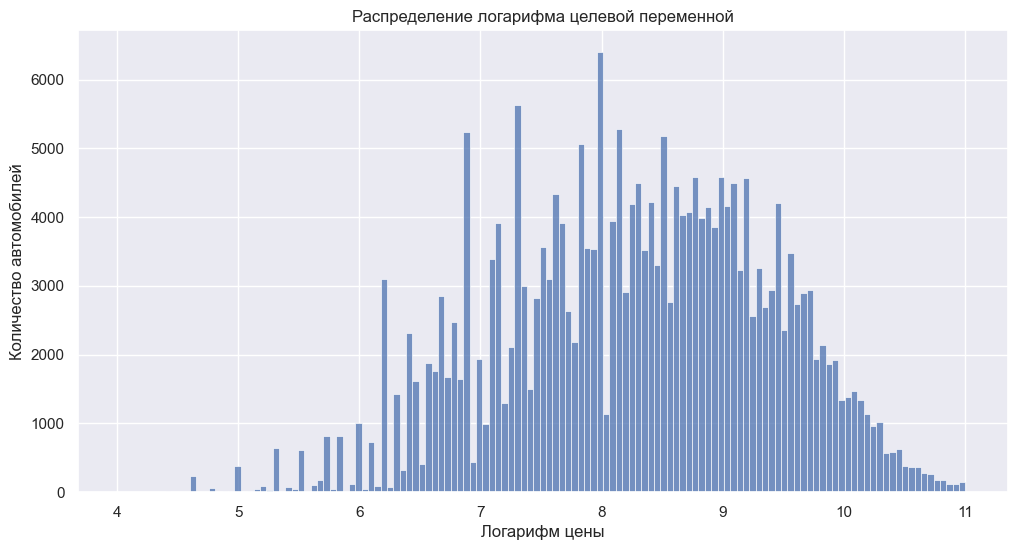

In [59]:
plt.figure(figsize=(12, 6))
sns.histplot(data['price'])
plt.title('Распределение логарифма целевой переменной')
plt.xlabel('Логарифм цены')
plt.ylabel('Количество автомобилей')
plt.show()

Теперь больше похоже на нормальное распределение. Посмотрим зависимость цены от остальных признаков (от модели строить не будем, она зависит от бренда):

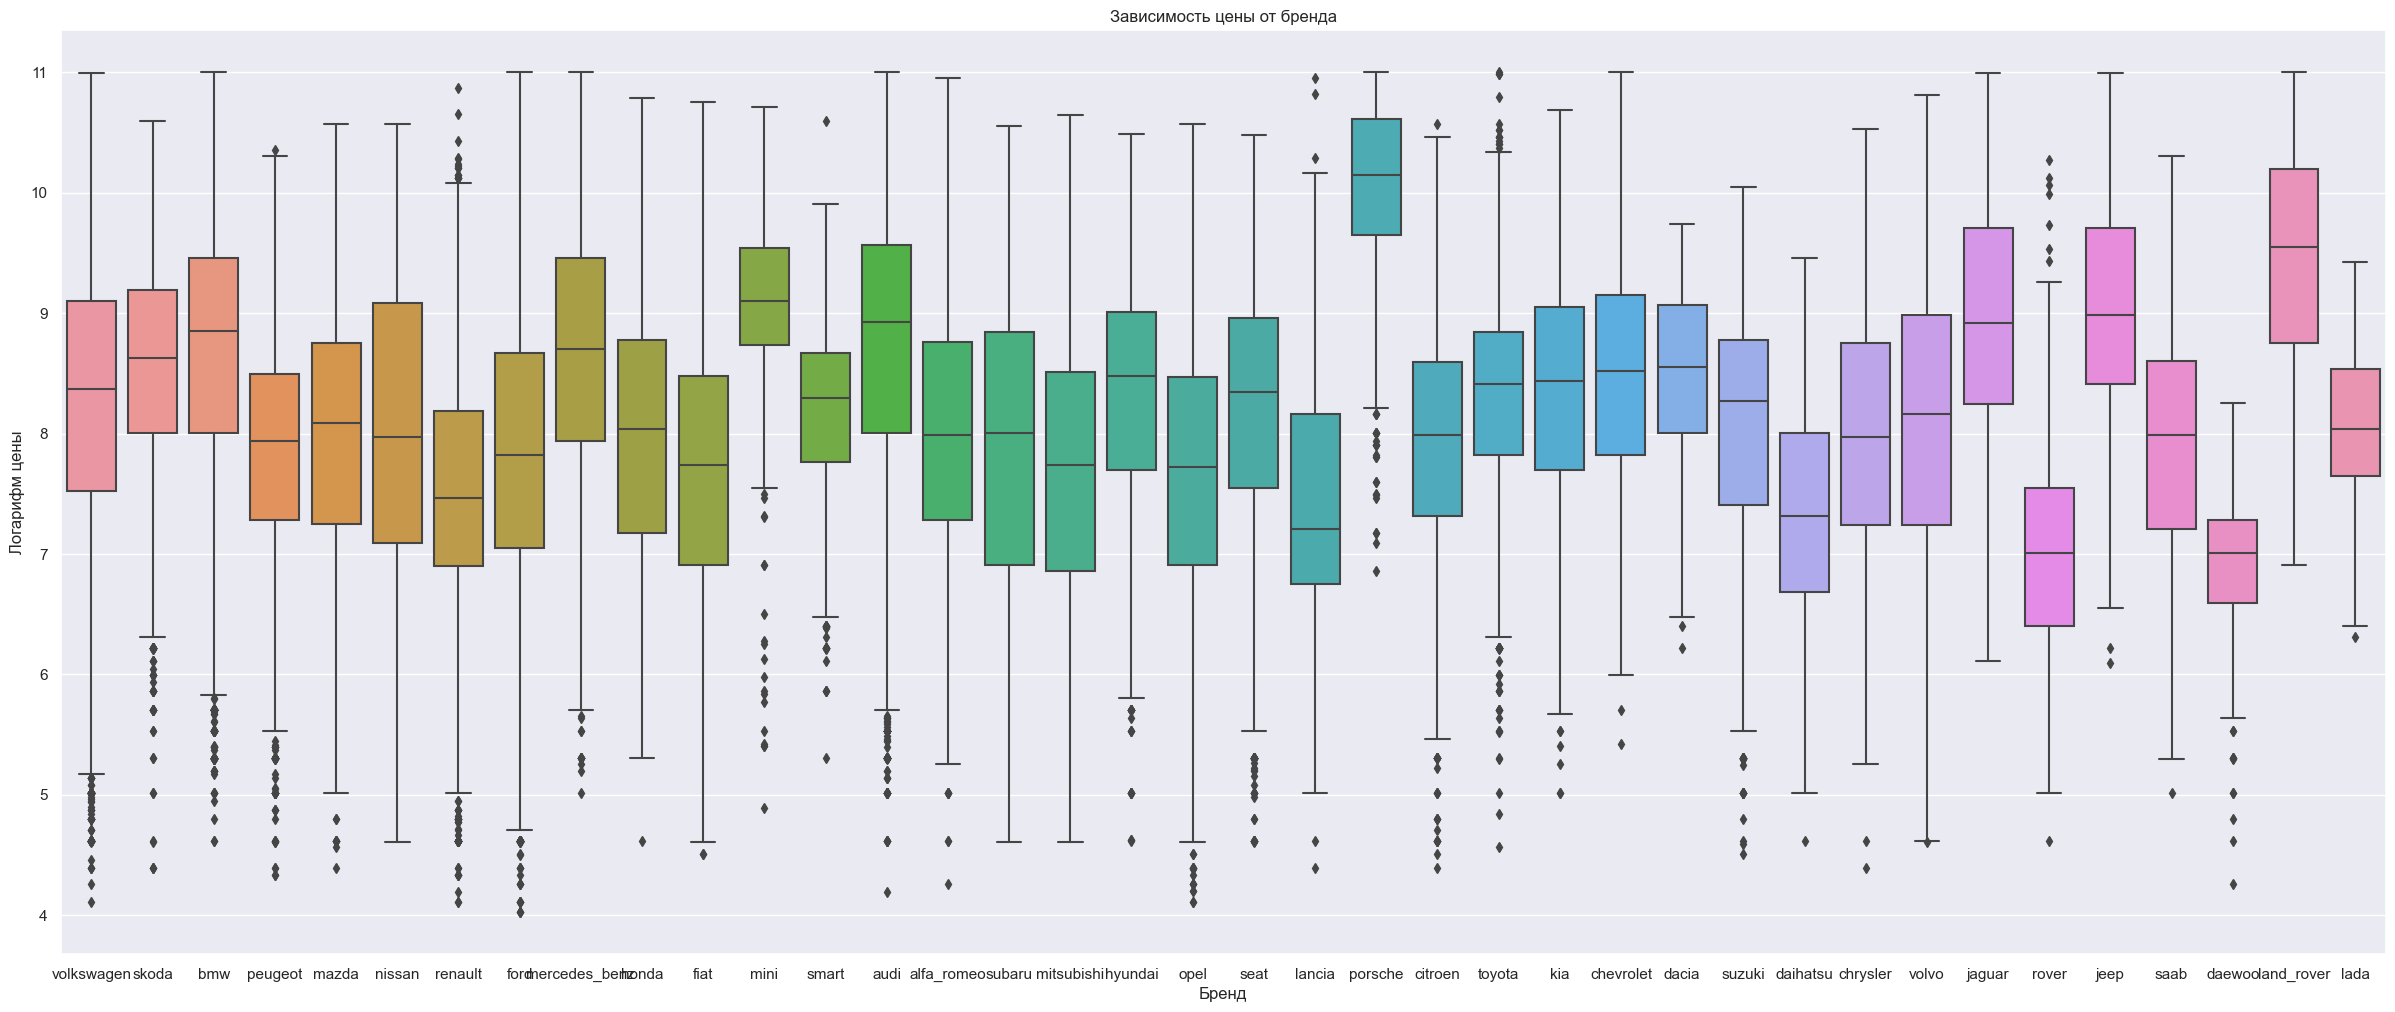

In [72]:
plt.figure(figsize=(30, 12))
sns.boxplot(data=data, x='brand', y='price')
plt.title('Зависимость цены от бренда')
plt.xlabel('Бренд')
plt.ylabel('Логарифм цены')
plt.show()

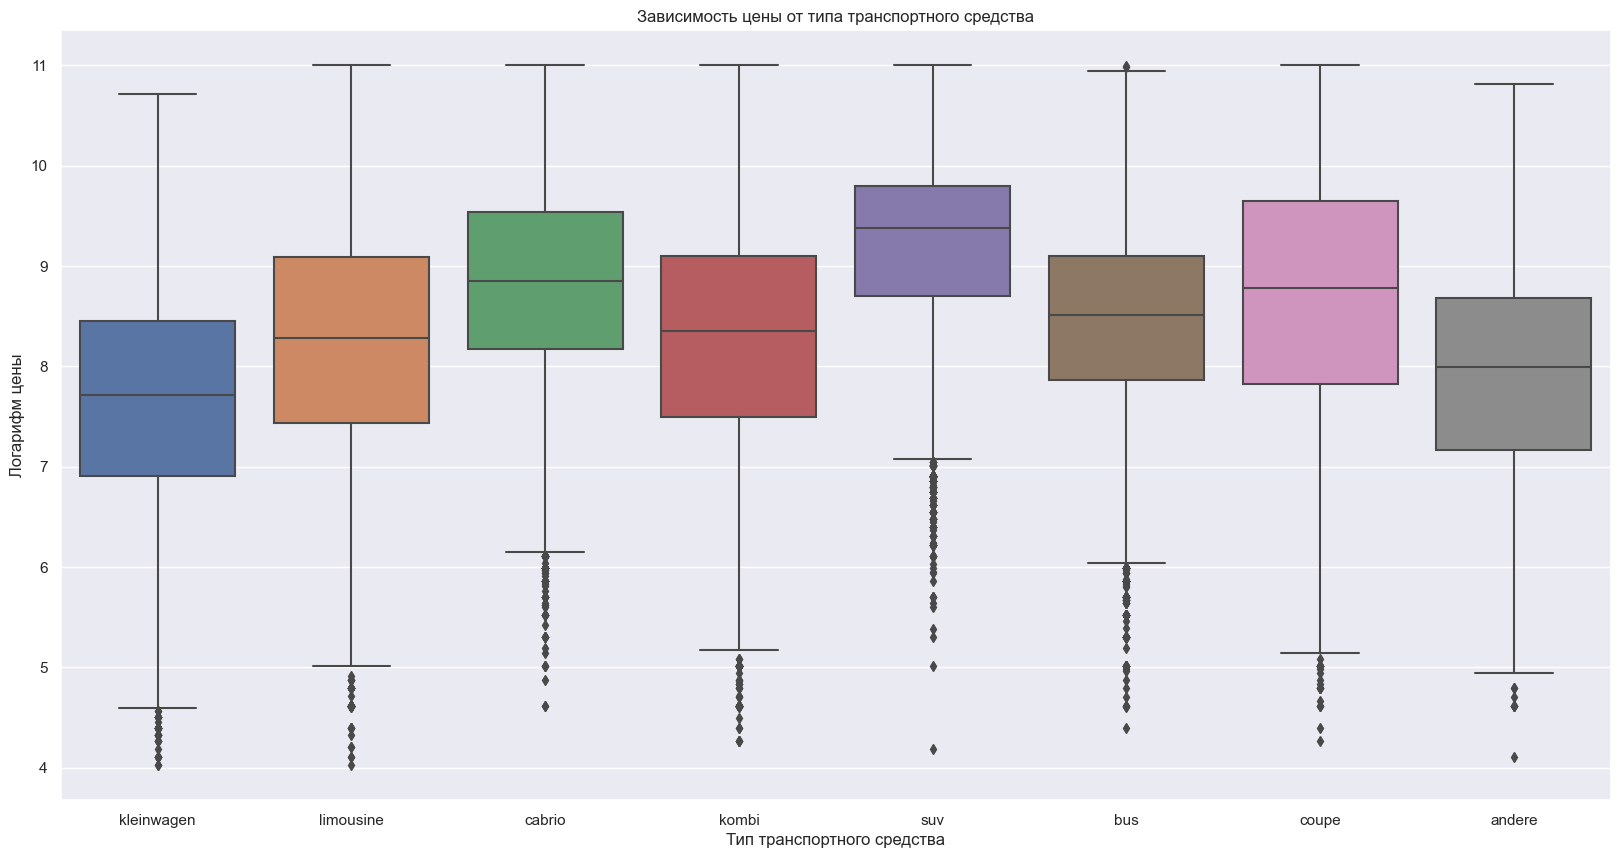

In [75]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=data, x='vehicleType', y='price')
plt.title('Зависимость цены от типа транспортного средства')
plt.xlabel('Тип транспортного средства')
plt.ylabel('Логарифм цены')
plt.show()

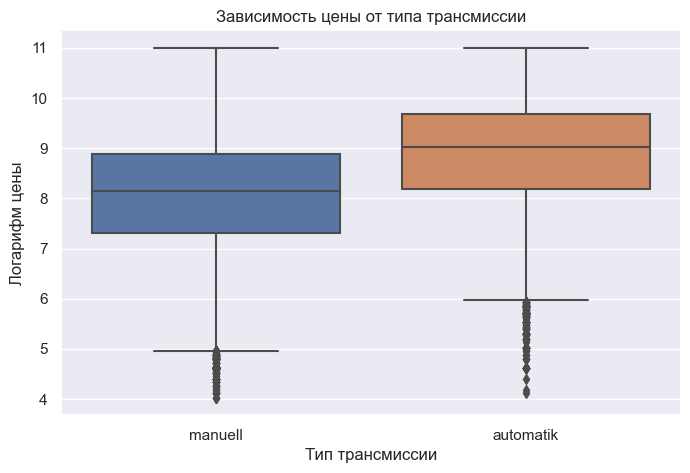

In [79]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x='gearbox', y='price')
plt.title('Зависимость цены от типа трансмиссии')
plt.xlabel('Тип трансмиссии')
plt.ylabel('Логарифм цены')
plt.show()

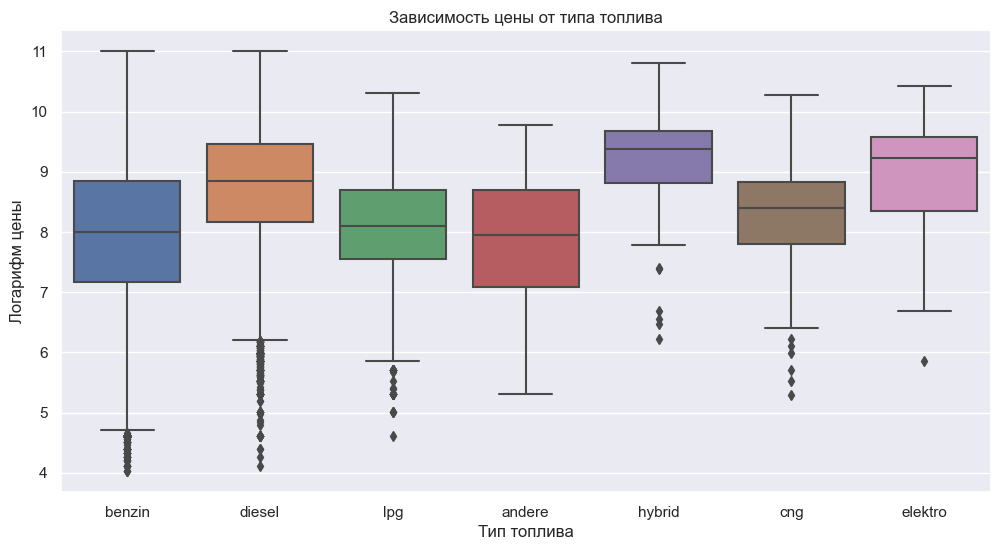

In [83]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='fuelType', y='price')
plt.title('Зависимость цены от типа топлива')
plt.xlabel('Тип топлива')
plt.ylabel('Логарифм цены')
plt.show()

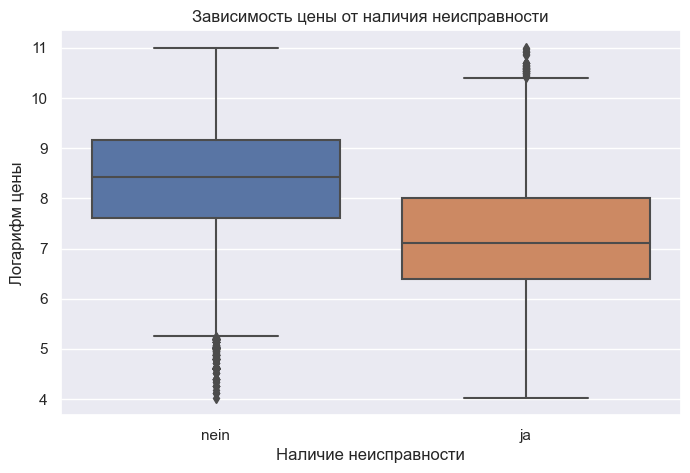

In [85]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x='notRepairedDamage', y='price')
plt.title('Зависимость цены от наличия неисправности')
plt.xlabel('Наличие неисправности')
plt.ylabel('Логарифм цены')
plt.show()

Теперь посмотрим на численные признаки:

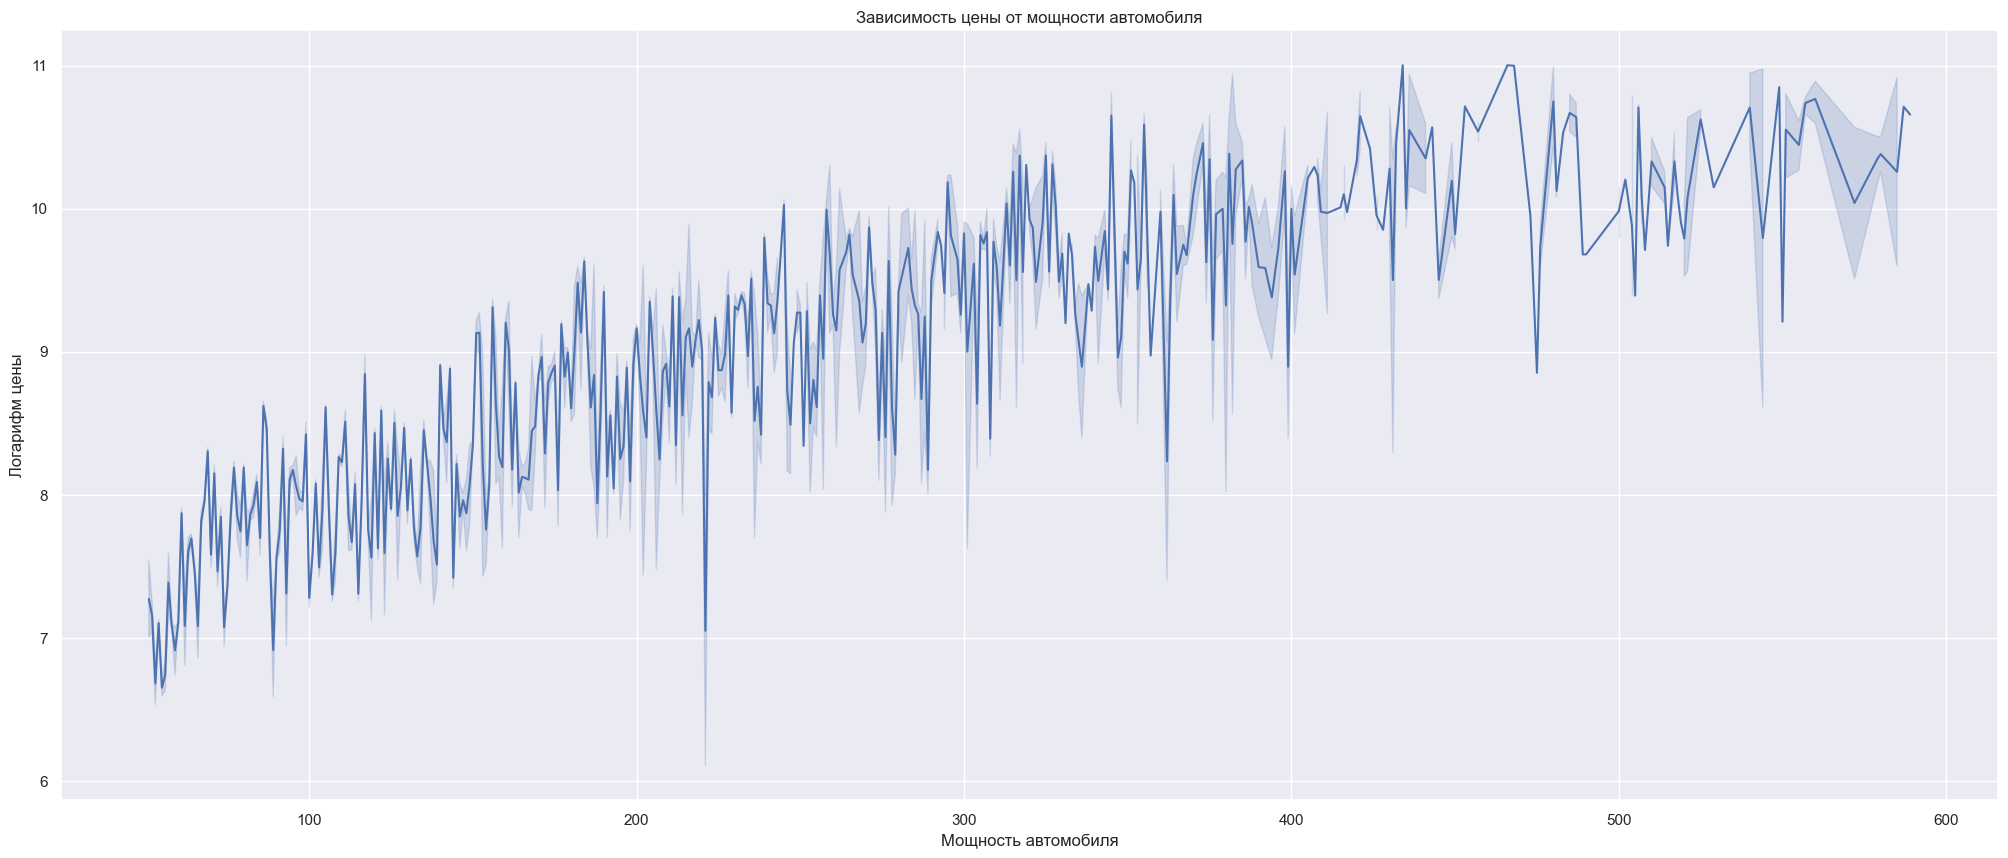

In [96]:
plt.figure(figsize=(25, 10))
sns.lineplot(data=data, x='powerPS', y='price')
plt.title('Зависимость цены от мощности автомобиля')
plt.xlabel('Мощность автомобиля')
plt.ylabel('Логарифм цены')
plt.show()

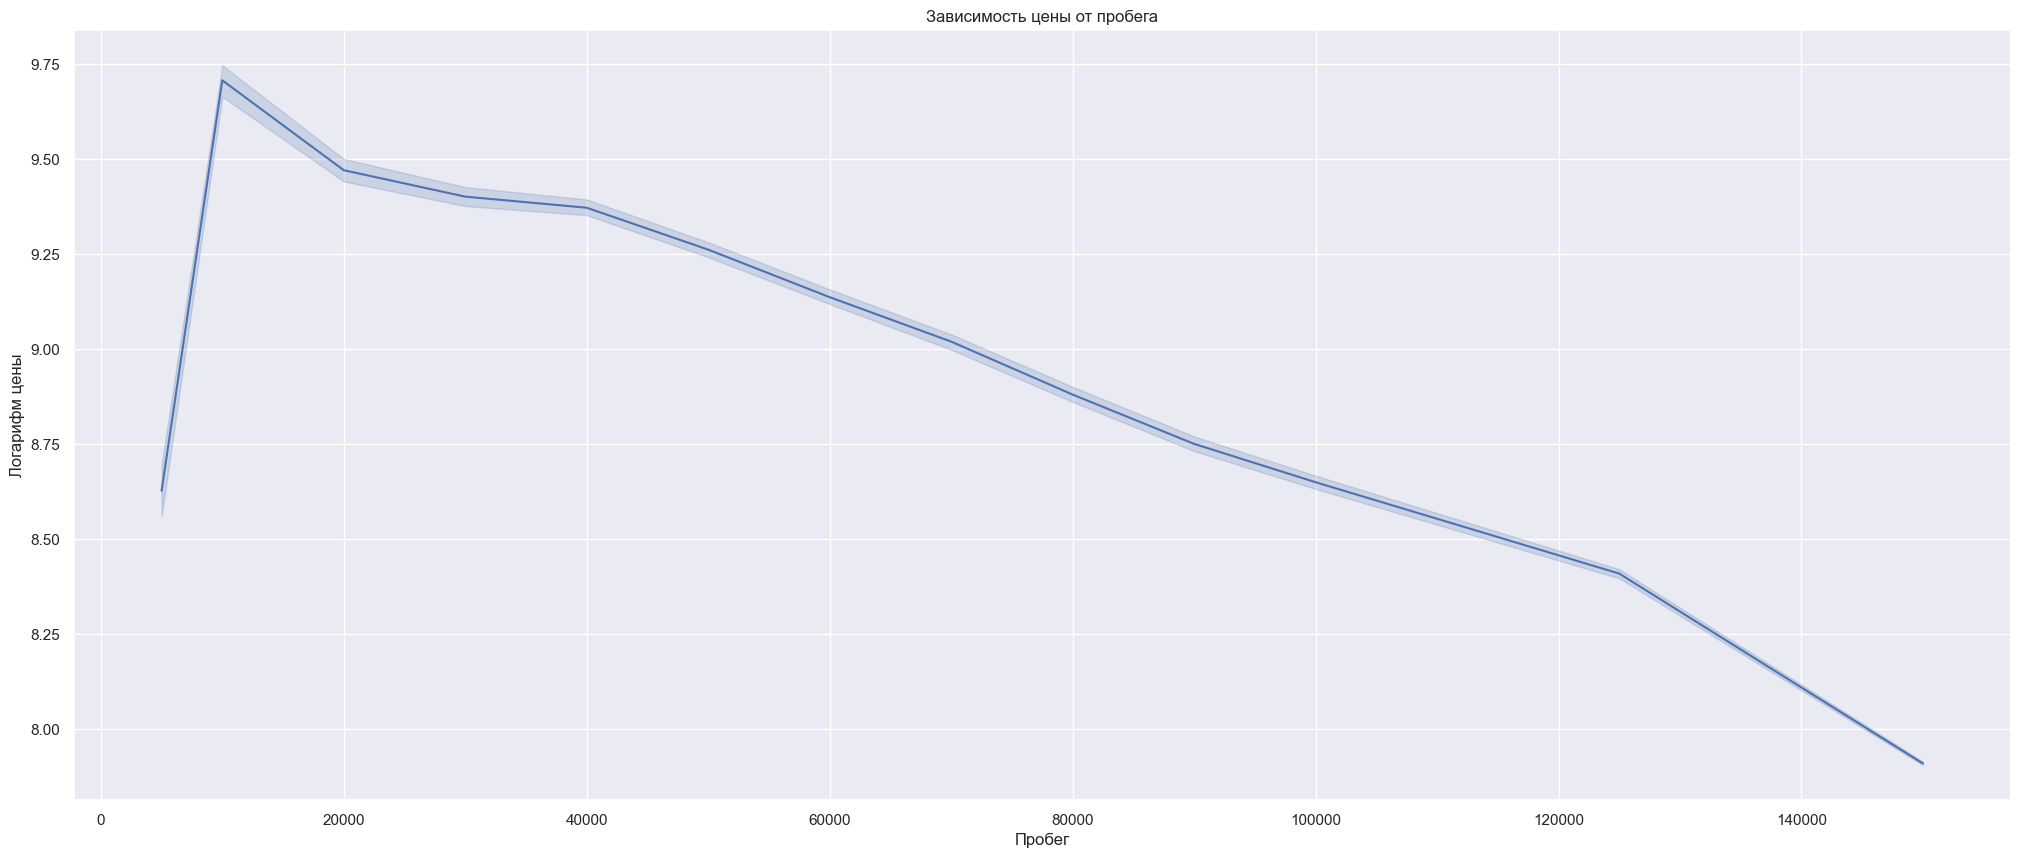

In [98]:
plt.figure(figsize=(25, 10))
sns.lineplot(data=data, x='kilometer', y='price')
plt.title('Зависимость цены от пробега')
plt.xlabel('Пробег')
plt.ylabel('Логарифм цены')
plt.show()

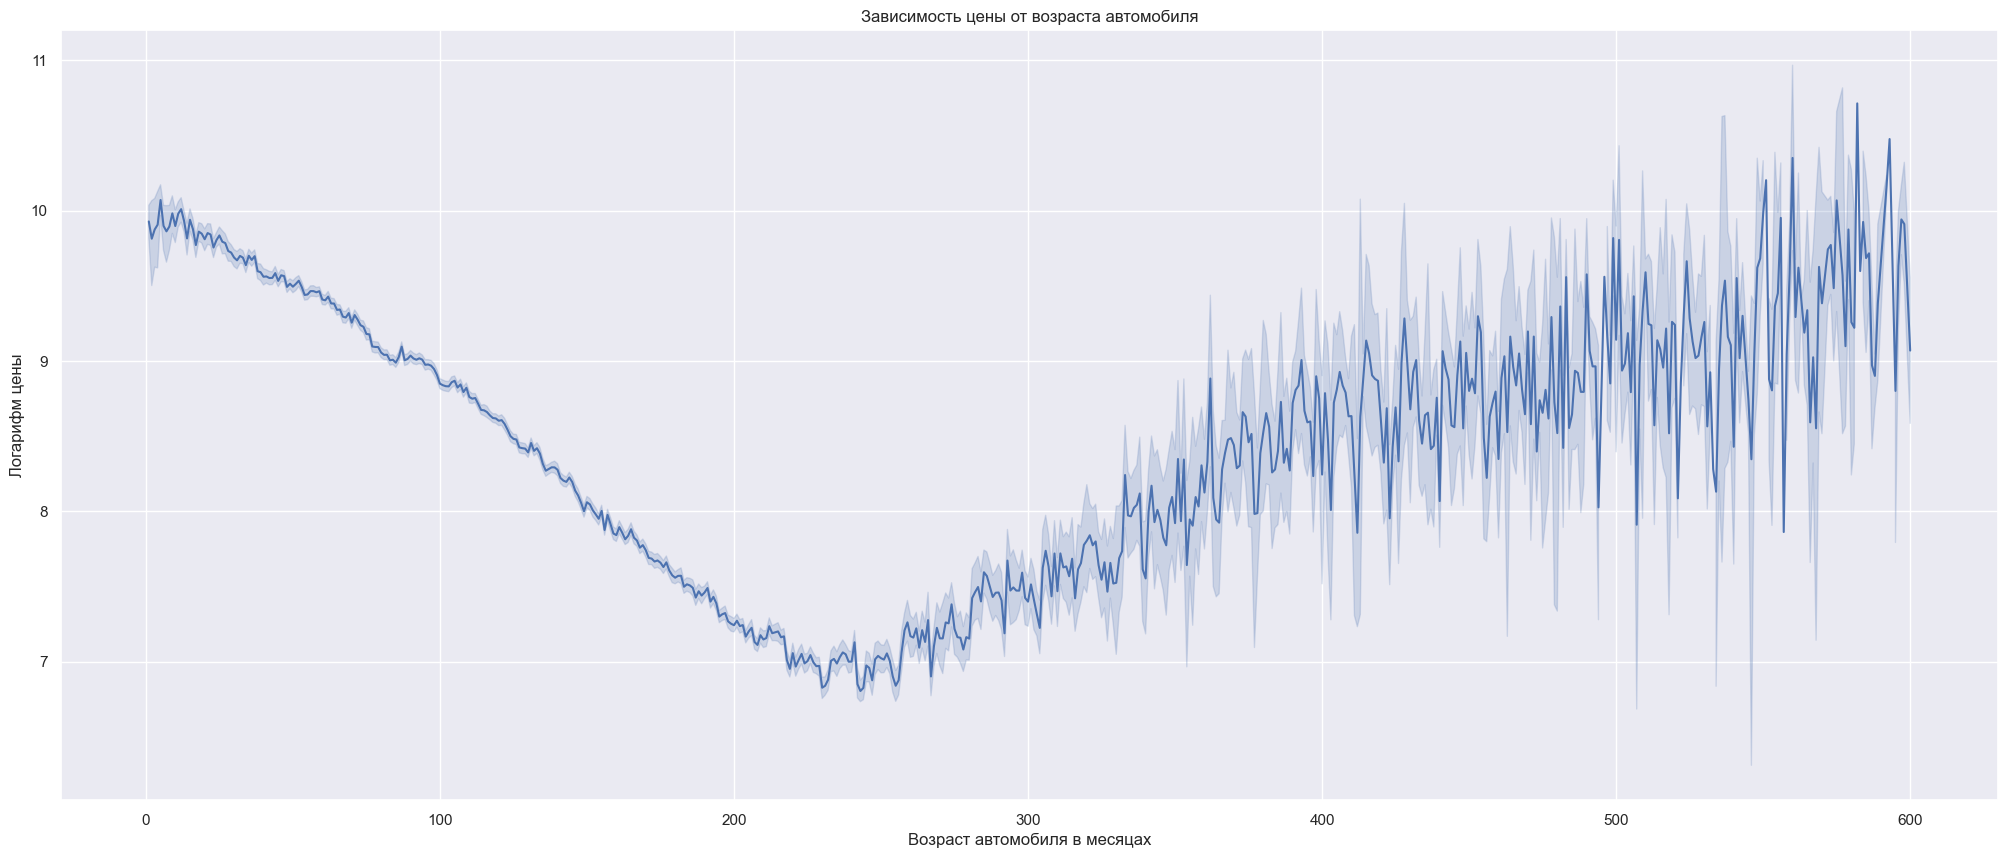

In [100]:
plt.figure(figsize=(25, 10))
sns.lineplot(data=data, x='autoAgeMonths', y='price')
plt.title('Зависимость цены от возраста автомобиля')
plt.xlabel('Возраст автомобиля в месяцах')
plt.ylabel('Логарифм цены')
plt.show()

Можем заметить, что все признаки важны, есть зависимость, значит ничего удалять не будем

In [105]:
data['bias'] = 1
other += ['bias']

x = data[categorical + numeric + other]
y = data['price']

In [107]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [144]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=25)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=25)

In [146]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
y_val = y_val.to_numpy()

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [202]:
from sklearn.metrics import r2_score

descents = ['full', 'stochastic', 'momentum', 'adam']
res = {i: {} for i in func}
lambdas = np.logspace(-4, -0.5, 4)
for descent_name in descents:
    best_lambda = None
    best_mse = np.inf
    for lambda_ in lambdas:
        descent_config = {
            'descent_name': descent_name,
            'kwargs': {'dimension': X_train.shape[1], 'lambda_': lambda_}
        }
        model = LinearRegression(descent_config=descent_config)
        model.fit(X_train, y_train)
        mse_val = model.calc_loss(X_val, y_val)
        mse_train = model.calc_loss(X_train, y_train)
        mse_test = model.calc_loss(X_test, y_test)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        r2_train = r2_score(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)
        loss_history = model.loss_history  
  
        if mse_val < best_mse:
            best_mse = mse_val
            best_lambda = lambda_
            res[descent_name] = {
                'method': descent_name,
                'lambda': best_lambda,
                'train_error': mse_train,
                'test_error': mse_test,
                'r2_train': r2_train,
                'r2_test': r2_test,
                'loss_history': loss_history,
                'iters':len(loss_history)
            }
res

{'full': {'method': 'full',
  'lambda': 0.31622776601683794,
  'train_error': 0.47583085592617724,
  'test_error': 0.47665937356876215,
  'r2_train': 0.6165078644117561,
  'r2_test': 0.6171601511049745,
  'loss_history': [21.97022926735383,
   6.068971475588746,
   1.1758034291360613,
   0.8341009031433166,
   0.780758153254961,
   0.7430673833459217,
   0.713634309742671,
   0.6895911950476094,
   0.6693774927277116,
   0.6520341645333082,
   0.636923146620868,
   0.6235959697563317,
   0.6117245354114919,
   0.6010613340553502,
   0.5914150439297357,
   0.5826347939643722,
   0.5745996037589025,
   0.5672110657180168,
   0.5603881365854522,
   0.5540633455162766,
   0.5481799791710287,
   0.5426899563169033,
   0.5375521988340127,
   0.5327313664340763,
   0.5281968620591769,
   0.5239220415621315,
   0.519883579516194,
   0.5160609557284263,
   0.5124360360512669,
   0.5089927275745865,
   0.5057166930086551,
   0.5025951125575316,
   0.4996164841853438,
   0.49677045514042095,
   0

### Задание 5.2. Сравнение методов (1 балла) 

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

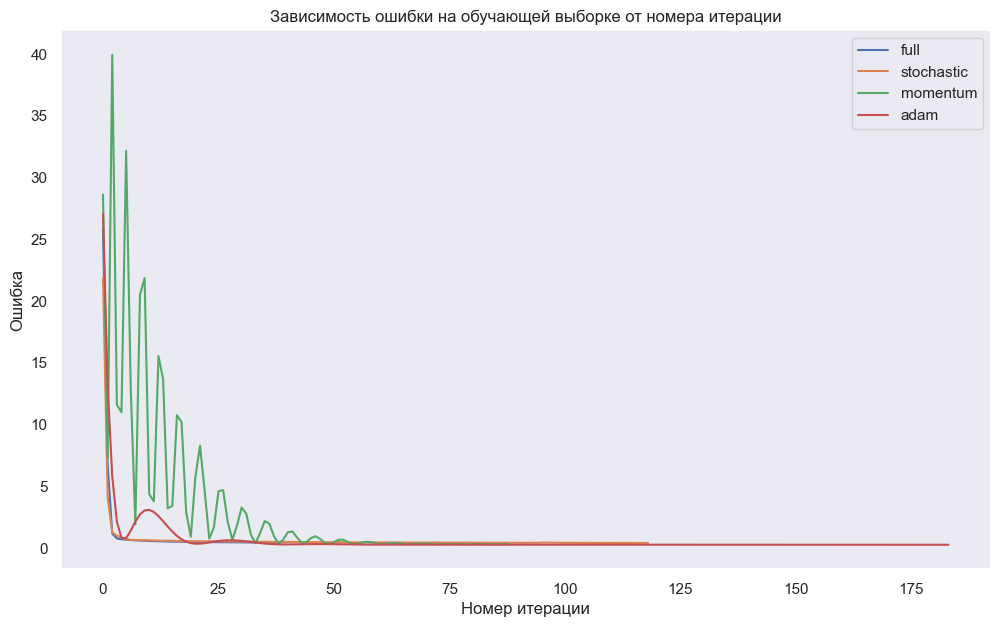

In [170]:
plt.figure(figsize=(12, 7)) 
for method, result in res.items():
    ind = range(len(result['loss_history'])) 
    plt.plot(ind, result['loss_history'], label=method)
plt.title('Зависимость ошибки на обучающей выборке от номера итерации')
plt.xlabel('Номер итерации')
plt.ylabel('Ошибка')
plt.grid()
plt.legend()
plt.show()

`### ваше решение тут ###`

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча. _(под сходимостью понимается достижение критерия останова)_
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [204]:
import time

batch_sizes = np.arange(5, 500, 10)
k = 10
res_s = []
for size in batch_sizes:
    iters = []
    times  = []
    descent_config = {
        'descent_name': 'stochastic', 
        'kwargs': {
            'dimension': X_train.shape[1],
            'lambda_': 0.31623,
            'batch_size': size
        }
    }
    model = LinearRegression(
        descent_config=descent_config
    )
    for _ in range(k):
        start = time.time()
        model.fit(X_train, y_train)
        end = time.time()
        times.append((end - start))
        iters.append((len(model.loss_history) - 1))
    res_s.append({
        'batch_size': size,
        'av_iters': np.mean(iters),
        'av_time': np.mean(times)
    })
res_s = pd.DataFrame(res_s)

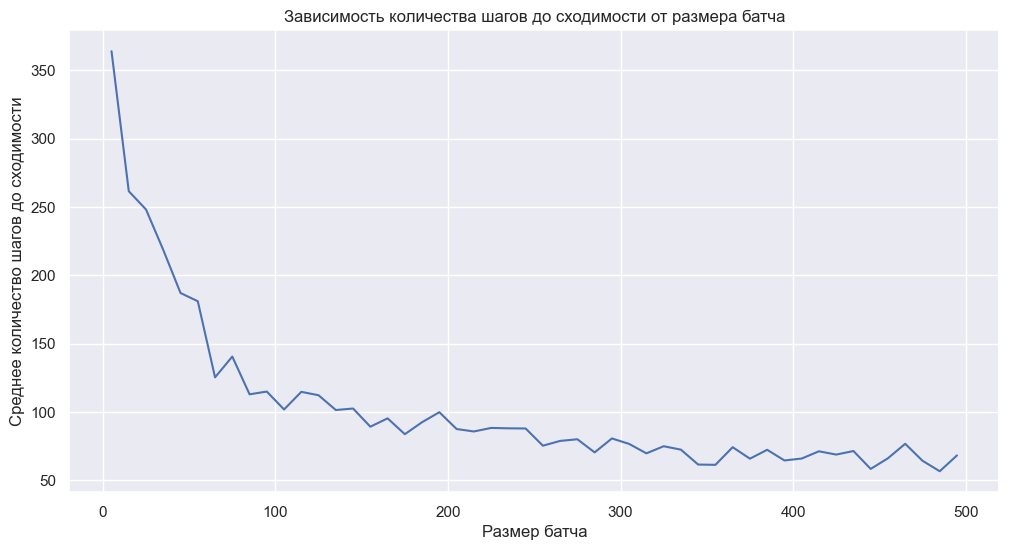

In [206]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=res_s, x='batch_size', y='av_iters')
plt.title('Зависимость количества шагов до сходимости от размера батча')
plt.xlabel('Размер батча')
plt.ylabel('Среднее количество шагов до сходимости')
plt.show()

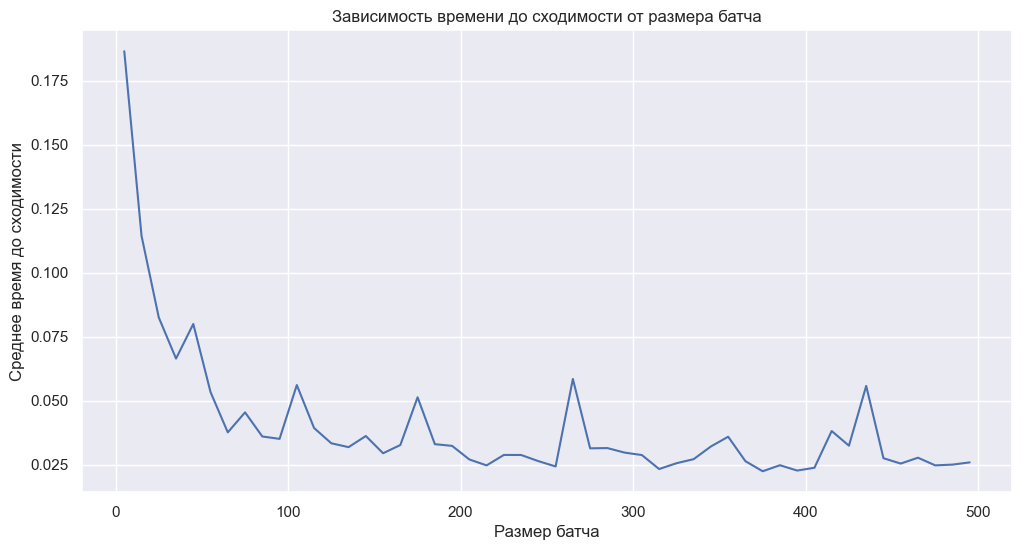

In [208]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=res_s, x='batch_size', y='av_time')
plt.title('Зависимость времени до сходимости от размера батча')
plt.xlabel('Размер батча')
plt.ylabel('Среднее время до сходимости')
plt.show()

При увеличении батча и время, и количество шагов снижаются. Мы можем это объяснить тем, что большие батчи позволяют сделать более точную модель

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**: 125035367

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [210]:
descents = ['full', 'stochastic', 'momentum', 'adam']
res_ = {i: {} for i in func}
lambdas = np.logspace(-5, -0.5, 5)
mus = np.logspace(-5, -0.5, 5)
for descent_name in descents:
    best_lambda = None
    best_mu = None
    best_mse = np.inf
    for lambda_ in lambdas:
        for mu in mus:
            descent_config = {
                'descent_name': descent_name,
                'regularized': True,
                'kwargs': {'dimension': X_train.shape[1], 'lambda_': lambda_, 'mu': mu}
            }
            model = LinearRegression(descent_config=descent_config)
            model.fit(X_train, y_train)
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)
            y_val_pred = model.predict(X_val)
            mse_train = ((y_train - y_train_pred) ** 2).mean()
            mse_test = ((y_test - y_test_pred) ** 2).mean()
            mse_val = ((y_val - y_val_pred) ** 2).mean()
            r2_train = r2_score(y_train, y_train_pred)
            r2_test = r2_score(y_test, y_test_pred)
            r2_val = r2_score(y_val, y_val_pred)
            loss_history = model.loss_history  
      
            if mse_val < best_mse:
                best_mse = mse_val
                best_lambda = lambda_
                best_mu = mu
                res_[descent_name] = {
                    'method': descent_name,
                    'lambda': best_lambda,
                    'mu': best_mu,
                    'train_error': mse_train,
                    'test_error': mse_test,
                    'r2_train': r2_train,
                    'r2_test': r2_test,
                    'loss_history': loss_history,
                    'iters':len(loss_history)
                }

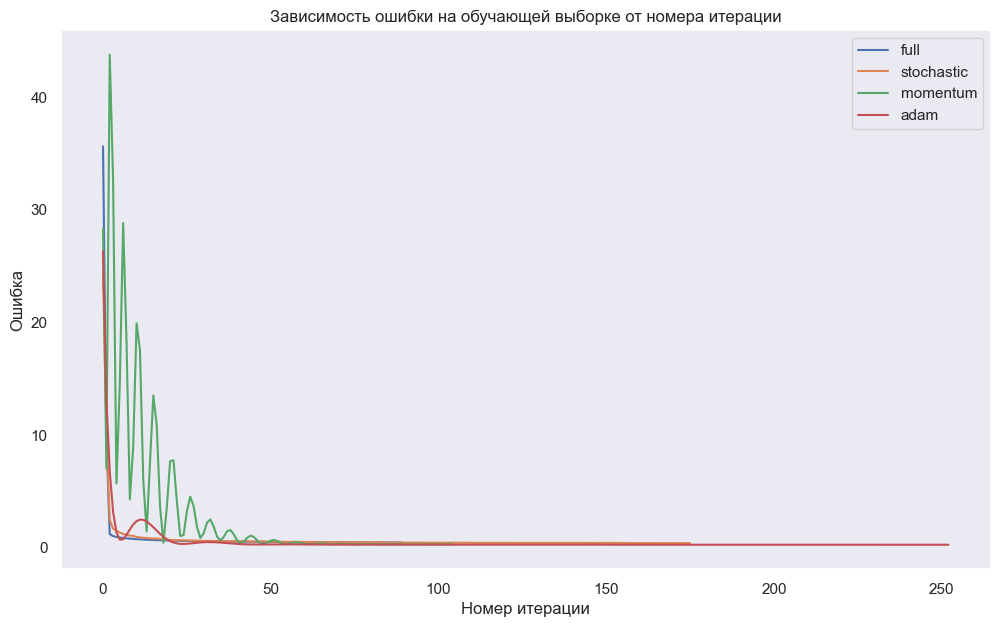

In [211]:
plt.figure(figsize=(12, 7)) 
for method, result in res_.items():
    ind = range(len(result['loss_history'])) 
    plt.plot(ind, result['loss_history'], label=method)
plt.title('Зависимость ошибки на обучающей выборке от номера итерации')
plt.xlabel('Номер итерации')
plt.ylabel('Ошибка')
plt.grid()
plt.legend()
plt.show()

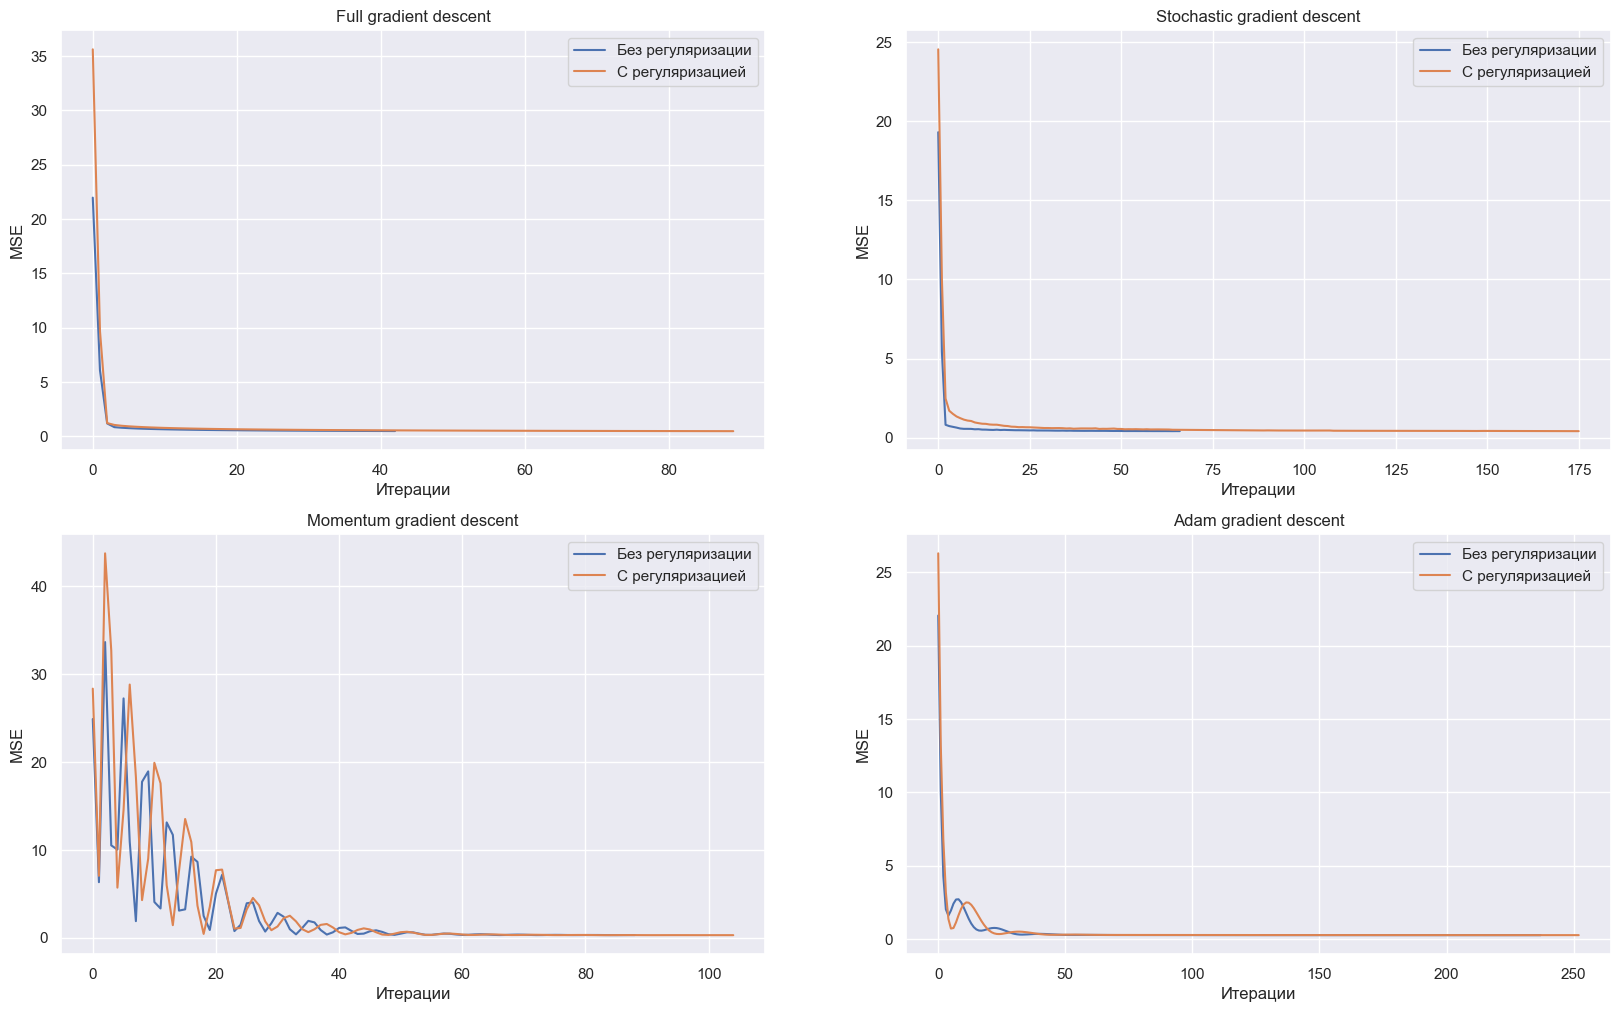

In [218]:
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
axes = axes.flatten()
for i, method in enumerate(descents):
    d1 = res[method]['loss_history']
    d2= res_[method]['loss_history']
    axes[i].plot(d1, label='Без регуляризации')
    axes[i].plot(d2, label='С регуляризацией')
    axes[i].set_title(f'{method.capitalize()} gradient descent')
    axes[i].set_xlabel('Итерации')
    axes[i].set_ylabel('MSE')
    axes[i].legend()
plt.show()

In [220]:
res_

{'full': {'method': 'full',
  'lambda': 0.31622776601683794,
  'mu': 0.023713737056616554,
  'train_error': 0.46544224048199206,
  'test_error': 0.45870549401036936,
  'r2_train': 0.624880487315201,
  'r2_test': 0.6315802190158449,
  'loss_history': [35.62756494543698,
   9.695266417151396,
   1.2087349882666087,
   1.0380255297500827,
   0.9628453689307862,
   0.9111348603685511,
   0.8709379893348366,
   0.8379551483866923,
   0.8100660200499431,
   0.7860152420949538,
   0.7649744199955721,
   0.7463588731014877,
   0.7297371023769056,
   0.7147803832357192,
   0.7012321987089958,
   0.688888525928992,
   0.6775845282107338,
   0.6671852512385131,
   0.65757893541743,
   0.6486720982835775,
   0.640385848858969,
   0.6326530797949891,
   0.6254162975390231,
   0.618625924297188,
   0.6122389541777344,
   0.6062178788063611,
   0.6005298204425379,
   0.5951458266238293,
   0.5900402918006434,
   0.5851904797183725,
   0.5805761263961108,
   0.5761791080813471,
   0.5719831619632639,


С регуляризацией количество итераций увеличилось, а значения R2 улучшились на обеих выборках выборках. MSE сильно снизилась, этого следовало ожидать, так как регуляризация предотвращает переобучение модели

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент _(требуется показать не только результат, но и промежуточные вычисления)_:

$$L(y, w) = \frac{1}{l} \log(\cosh(Xw - y))$$
$$z = Xw - y$$
$$\frac{dL}{dz} = \frac{1}{l} \frac{1}{\cosh(z)} \frac{d(\cosh(z))}{dz} = \frac{1}{l} \frac{1}{\cosh(z)} \sinh(z) = \frac{1}{l} \tanh(z)$$
$$\frac{dz}{dw} = X$$
$$\frac{dL}{dw} = \frac{1}{l} \frac{dL}{dz} \frac{dz}{dw} = \frac{1}{l}\tanh(z) X$$
$$\nabla L(y, w) =  \frac{1}{l} X^T \tanh(Xw - y).$$

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [ ]:
# YOUR CODE:

### Кулинарно-социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.

`### ваш кулинарный опыт тут ###`

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [ ]:
# YOUR CODE:

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты _(требуется показать не только результат, но и промежуточные вычисления)_:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [ ]:
# YOUR CODE: